# "Principal Component Analysis"
> "Explain PCA using R and implementation form scratch in Python along with its application"

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [notebook, R]
- image: images/vignette/pca.png
- hide: false
- search_exclude: true

# Structure
I have used R for some of the tasks and Python for the implementation of the PCA from scratch. If you are not familiar with R, you can still understand all of the material.

1. [Introduction to PCA](#Introduction-to-PCA)
2. [How PCA reduces dimensionlity](#How-PCA-reduces-dimensionality)
3. [Scree Plot](#Computing-PCA-and-Scree-Plot)
4. [Dimensionality reduction](#Dimensionality-reduction)
5. [PCA Code in python](#PCA-from-scratch)
6. [Application of PCA](#Application-of-PCA)

# Introduction to PCA
PCA is a **dimensionality reduction technique** used in Data Analysis and Machine Learning. 

Why we need PCA?<br/>
In Data Analysis, we can easily visualize a dataset with upto three features but for four or more features we can't envisage the data and then we use PCA to make it 3-D, 2-D or even 1-D **with minimum loss of inherent distribution of the data**.

In Machine Learning, a dataset with large number of features is computationally expensive and thus PCA can be used to reduce the number of features that do not account for much variance in the dataset.
> PCA requires working knowledge of eigenvalues and eigenvectors.

*Code in the below cell generates a synthetic dataset with **3 Features** and **50 Samples** generated from multivariate random distribution.*

In [2]:
# collapse
library(repr)
library(MASS)
library(ggplot2)
library(ggthemes)
library(ggrepel)
nsamples <- 50
nfeatures <- 3
data <- matrix(nrow = nsamples, ncol = nfeatures)
colnames(data) <- paste("feature", 1:nfeatures, sep = "")
rownames(data) <- paste("sample", 1:nsamples, sep = "")

# Create 
data[1:25,] = mvrnorm(n = 25, mu = c(3,3,3), Sigma = diag(3))
data[26:50,] = mvrnorm(n = 25, mu = c(-3,-3,-3), Sigma = diag(3))

head(data)

,feature1,feature2,feature3
sample1,2.9004428,4.432834,2.446806
sample2,0.8520609,2.716428,1.874973
sample3,3.4785137,1.192842,3.489447
sample4,1.4914388,2.960234,2.386250
sample5,2.2667772,1.560220,3.739343
sample6,1.6049576,2.042158,2.253335



# How PCA reduces dimensionality
Our goal here is to remove the 3rd dimension(Feature3) with minimal loss in the structure of the data.

1. A dataset with **N-Samples** and **M-Features** can be considered as a [N X M] matrix and we know that every matrix has a set of pairs of **Eigenvalues** and their corresponding **Eigenvectors** associated with it.
2. Eigenvecotrs are usual vectors and thus we know the refer to some direction.
3. Intuitively the Eigenvalues tells the amount of variance in data in the direction of its corresponding Eigenvector.
4. Therefor the the Eigenvector with the highest Eigenvalue is the principal component of the data i.e. direction of maximum variance in the data.
5. number of components = min of nsamples and features, thus in our case we'll have 3 principal components <br/>
(contn.)

In the figure below Line-2 roughly accounts fits the data best and account for most of the variance. What this means is that, since we have two clusters in the dataset, if we project the all the datapoints onto the Line-2 and discard rest of the dimensions then we'll still have enough information to distinguish two clusters.

Roughly speaking, Line-1 will be our PC1 and Line-2 will be the PC2 which is perpendicular to PC1

> Feature3 is represented by the size of the point i.e larger the point => larger the feature3

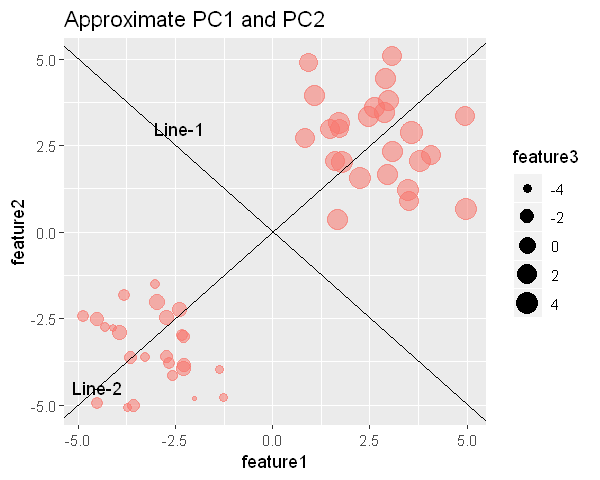

In [3]:
p <- ggplot() +
geom_point(data=data.frame(data), 
           aes(x=feature1, y=feature2, size=feature3, color="red", alpha=0.24)
) +
geom_abline(slope = 1, intercept = 0) +
geom_abline(slope = -1, intercept = 0) +
guides(color=F, alpha=F)  +
annotate("text", x= -2.4, y = 3 , label="Line-1") +
annotate("text", x= -4.5, y = -4.5 , label="Line-2") + 
ggtitle("Approximate PC1 and PC2")
options(repr.plot.width = 5, repr.plot.height = 4)
p

6. Once we have found the Principal Components of the dataset, we set these PC's as new axes of the dataset.
7. Upto this point we have preseverd the actual data without any dimensionality reduction.
8. We discard the PC's which accounts for less variance and get new dataset with less features and with maximum resemblance with the original dataset.

> In a real world situation, we measure values of features on the original scales/axes i.e. Real Number line but this may not capture maximum essence of data and therfore through PCA we essentially change our axes such that it now explains the data better than the original axes.

# Computing PCA and Scree Plot
I'll use **prcomp()** utility of R to calculate Principal Components. of the data and then discard the component with less variance the reduce dimensionality.


In [4]:
# collapse
pca <- prcomp(data)
# prcomp returns x, stdev, rotation
# where x is the data transposed on PC's
# sdev 

**Scree Plot**: it shows the variance captured by each principal components.

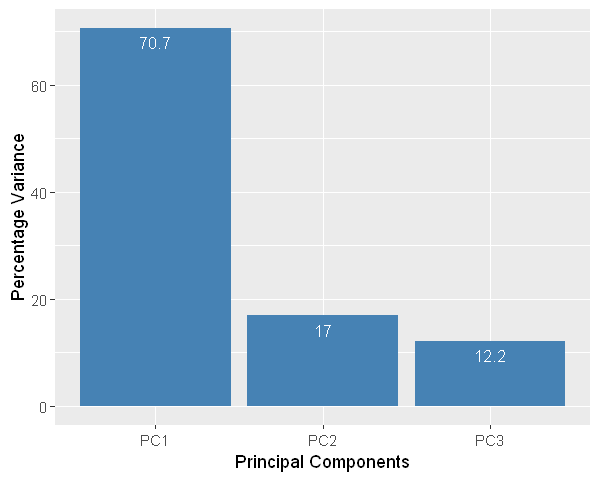

In [5]:
pca.var = pca$sdev
# Percentage of variation each component accounts for
pca.var.per =  round(pca.var / sum(pca.var) * 100, 1)

ggplot(mapping = aes(x = paste("PC", 1:3, sep = ""), y = pca.var.per)) +
geom_bar(stat = "identity", fill='steelblue') +
xlab("Principal Components") +
ylab("Percentage Variance") +
geom_text(aes(label=pca.var.per), vjust=1.6, color="white", size=3.5)

Finally we plot the data with reduced dimensions and it is evident from the figure that even if we discard the PC3, PC1 and PC2 still captures most of the distribution of the data.

Data is still divided into two clusters. 

# Dimensionality reduction

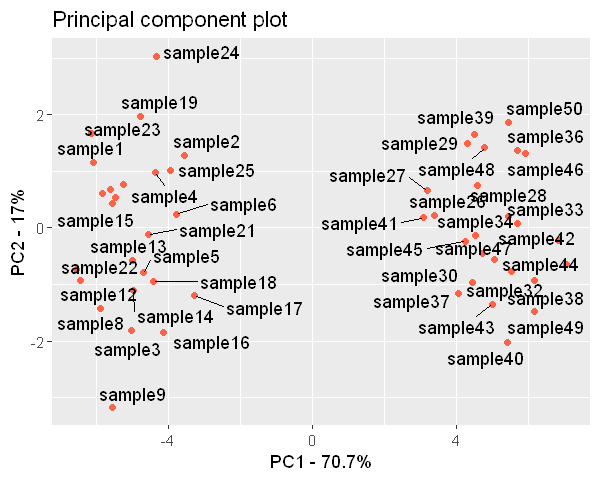

In [6]:
pca.data = data.frame(Sample=rownames(pca$x),
                      X = pca$x[,1],
                      Y = pca$x[,2])
ggplot(data=pca.data, aes(x = X, y = Y, label = Sample)) +
geom_point(color='tomato') +
geom_text_repel() + 
xlab(paste("PC1 - ", pca.var.per[1], "%", sep = "")) +
ylab(paste("PC2 - ", pca.var.per[2], "%", sep = "")) +
ggtitle("Principal component plot")

# PCA form scratch
Overview of functions used:

1. center_data - to scale the data such that each feature in the dataset has mean 0
2. principal_component - returns the PC's (eigenvectors) of the data
3. project_onto_PC - perform dimensionality reduction by projecting the data onto PC's
4. plot_PC - used to visualize the resulting image after dimensionality reduction
5. reconstruct_PC - reconstruct an image from PCA

In [11]:
import numpy as np
import matplotlib.pyplot as plt


def project_onto_PC(X, pcs, n_components):
    """
    Given principal component vectors pcs = principal_components(X)
    this function returns a new data array in which each sample in X
    has been projected onto the first n_components principcal components.

    Args:
        X - n x d Numpy array
        pcs - d x d Numpy array with each column as an eigenvector sorted in 
        decreasing order of their corresponding eigenvalues.
        n_components - (scalar) top principal components
    Returns:
        projected_data - n x n_components Numpy array with n samples and n_components features
    """
    # Step1: Center the data such that for each feature of a sample, mean = 0.
    # This step is often called scaling
    X_bar = center_data(X)

    # Step2: Projection onto the n_components principal components.
    n_pcs = pcs[:, :n_components]
    projected_data = X_bar @ n_pcs

    return projected_data



def center_data(X):
    """
    Returns a centered version of the data, where each feature now has mean = 0

    Args:
        X - n x d NumPy array of n data points, each with d features

    Returns:
        n x d NumPy array X' where for each i = 1, ..., n and j = 1, ..., d:
        X'[i][j] = X[i][j] - means[j]
    """
    feature_means = X.mean(axis=0)
    return(X - feature_means)


def principal_components(X):
    """
    Returns the principal component vectors of the data, sorted in decreasing order
    of eigenvalue magnitude. This function first caluclates the covariance matrix
    and then finds its eigenvectors.

    Args:
        X - n x d NumPy array of n data points, each with d features

    Returns:
        d x d NumPy array whose columns are the principal component directions sorted
        in descending order by the amount of variation each direction (these are
        equivalent to the d eigenvectors of the covariance matrix sorted in descending
        order of eigenvalues, so the first column corresponds to the eigenvector with
        the largest eigenvalue
    """
    centered_data = center_data(X)  # first center data
    scatter_matrix = centered_data.T @ centered_data
    eigen_values, eigen_vectors = np.linalg.eig(scatter_matrix)
    # Re-order eigenvectors by eigenvalue magnitude:
    idx = eigen_values.argsort()[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:, idx]
    return eigen_vectors


def plot_PC(X, pcs, labels):
    """
    Given the principal component vectors as the columns of matrix pcs,
    this function projects each sample in X onto the first two principal components
    and produces a scatterplot where points are marked with the digit depicted in
    the corresponding image.
    labels = a numpy array containing the digits corresponding to each image in X.
    """
    pc_data = project_onto_PC(X, pcs, n_components=2)
    text_labels = [str(z) for z in labels.tolist()]
    fig, ax = plt.subplots()
    ax.scatter(pc_data[:, 0], pc_data[:, 1], alpha=0, marker=".")
    for i, txt in enumerate(text_labels):
        ax.annotate(txt, (pc_data[i, 0], pc_data[i, 1]))
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    plt.show()

def reconstruct_PC(x_pca, pcs, n_components, X):
    """
    Given the principal component vectors as the columns of matrix pcs,
    this function reconstructs a single image from its principal component
    representation, x_pca.
    X = the original data to which PCA was applied to get pcs.
    """
    feature_means = X - center_data(X)
    feature_means = feature_means[0, :]
    x_reconstructed = np.dot(
        x_pca, pcs[:, range(n_components)].T) + feature_means
    return x_reconstructed

In [34]:
from PIL import  Image
%matplotlib notebook

# Read image from local folder
image = Image.open("digit.jpg")
# Convert image into a numpy array
image = np.asarray(image)

# Perform PCA
n_components=18
pcs = principal_components(image)
pca_image = project_onto_PC(image, pcs, n_components)

<IPython.core.display.Javascript object>


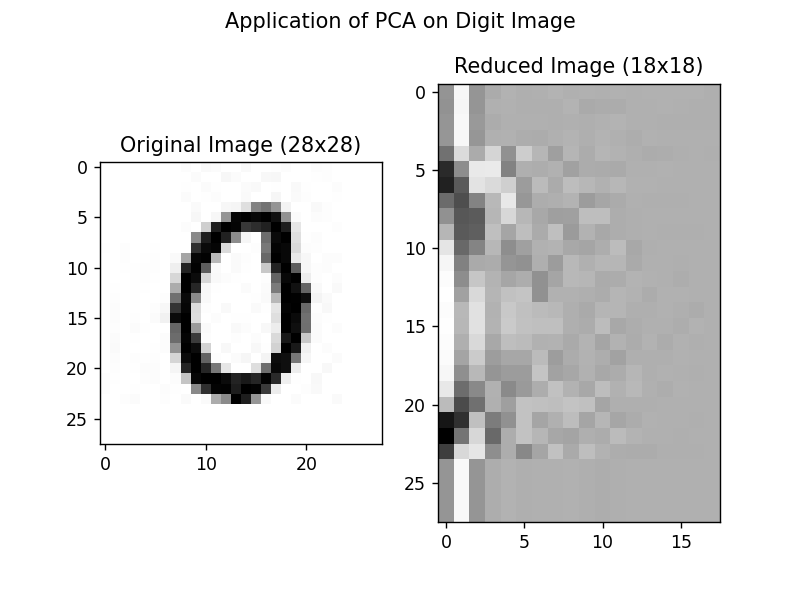

In [36]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image, cmap='Greys')
ax[1].imshow(pca_image, cmap='Greys')
ax[0].set_title("Original Image (28x28)")
ax[1].set_title("Reduced Image (18x18)")
fig.suptitle("Application of PCA on Digit Image")
fig.show()